Scenario: The product team needs to segment customers based on their purchasing behavior for a new feature rollout.

Database Schema:

user_activity: 
-user_id
-last_login_date
-feature_usage_count
-account_type

transactions: 
-transaction_id
-user_id
-transaction_date
-amount
-platform

user_preferences: 
-user_id
-communication_preference
-interface_theme
-notification_settings


Prompt: 

I'm working on a new analysis to understand customers' purchasing behavior. Here's the hypothetical database schema I'm working with:

1. user_activity 
user_id
last_login_date
feature_usage_count
account_type

2. transactions
transaction_id
user_id
transaction_date
amount
platform

3. user_preferences
user_id
communication_preference
interface_theme
notification_settings

I first need to create dataframes for each of these three databases using random values. Create 30 rows for each. The dataframes should be titled "user_activity", "transactions", and "user_preferences". Dates should be formatted MM/DD/YYYY (no timestamp included). Communication_preference values should be call, text, email, or pigeon. 

In [31]:
#Generated code

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Set seed for reproducibility
np.random.seed(42)
random.seed(42)

# Helper function to generate random dates
def random_dates(start, end, n):
    return [(start + timedelta(days=random.randint(0, (end - start).days))).strftime("%m/%d/%Y") for _ in range(n)]

# Generate user_ids
user_ids = [f"user_{i+1}" for i in range(30)]

# --------------------------
# 1. user_activity DataFrame
# --------------------------
user_activity = pd.DataFrame({
    'user_id': user_ids,
    'last_login_date': random_dates(datetime(2023, 1, 1), datetime(2024, 12, 31), 30),
    'feature_usage_count': np.random.randint(0, 101, size=30),
    'account_type': np.random.choice(['free', 'premium', 'enterprise'], size=30)
})

# --------------------------
# 2. transactions DataFrame
# --------------------------
transaction_ids = [f"txn_{i+1}" for i in range(30)]

transactions = pd.DataFrame({
    'transaction_id': transaction_ids,
    'user_id': np.random.choice(user_ids, size=30),
    'transaction_date': random_dates(datetime(2023, 6, 1), datetime(2025, 1, 1), 30),
    'amount': np.round(np.random.uniform(10.0, 500.0, size=30), 2),
    'platform': np.random.choice(['web', 'mobile', 'tablet'], size=30)
})

# --------------------------
# 3. user_preferences DataFrame
# --------------------------
user_preferences = pd.DataFrame({
    'user_id': user_ids,
    'communication_preference': np.random.choice(['call', 'text', 'email', 'pigeon'], size=30),
    'interface_theme': np.random.choice(['light', 'dark', 'auto'], size=30),
    'notification_settings': np.random.choice(['all', 'mentions_only', 'none'], size=30)
})

# Display first few rows for verification
print("user_activity:")
print(user_activity.head(), "\n")

print("transactions:")
print(transactions.head(), "\n")

print("user_preferences:")
print(user_preferences.head())

user_activity:
  user_id last_login_date  feature_usage_count account_type
0  user_1      10/16/2024                   51   enterprise
1  user_2      04/25/2023                   92   enterprise
2  user_3      01/26/2023                   14   enterprise
3  user_4      10/09/2023                   71      premium
4  user_5      09/08/2023                   60   enterprise 

transactions:
  transaction_id  user_id transaction_date  amount platform
0          txn_1  user_12       03/11/2024  289.52   mobile
1          txn_2  user_29       06/07/2023  265.21   tablet
2          txn_3   user_8       11/11/2023  480.97   tablet
3          txn_4  user_15       08/06/2024  423.82      web
4          txn_5   user_3       05/14/2024  376.19   tablet 

user_preferences:
  user_id communication_preference interface_theme notification_settings
0  user_1                    email            dark         mentions_only
1  user_2                    email            auto         mentions_only
2  user_3 

1. Create a SQL query to identify active users (logged in last 30 days)
Prompt: 

Dataframes look great. Let's start the analysis. I need to understand which users have logged in in the last 30 days and what percentage of our users are thus considered "active". Use a SQL query to select the user_id and last_login_date from user_activity. Run the query and then produce a sum of those users and divide it by the len(user_id).

In [32]:
import pandasql as ps
from datetime import datetime

# Today's date
today = datetime.today()
cutoff_date = today - timedelta(days=30)
cutoff_str = cutoff_date.strftime("%m/%d/%Y")

# SQL query to select users who logged in within the last 30 days
query = f"""
SELECT user_id, last_login_date
FROM user_activity
WHERE DATE(substr(last_login_date, 7, 4) || '-' || substr(last_login_date, 1, 2) || '-' || substr(last_login_date, 4, 2)) >= DATE('{cutoff_str}')
"""

# Run SQL query
active_users_df = ps.sqldf(query, locals())

# Calculate percentage of active users
num_active_users = len(active_users_df)
total_users = len(user_activity['user_id'])
percent_active = (num_active_users / total_users) * 100

# Display results
print("Active Users (Last 30 Days):")
print(active_users_df)
print(f"\nNumber of Active Users: {num_active_users}")
print(f"Total Users: {total_users}")
print(f"Percentage Active: {percent_active:.2f}%")

Active Users (Last 30 Days):
Empty DataFrame
Columns: [user_id, last_login_date]
Index: []

Number of Active Users: 0
Total Users: 30
Percentage Active: 0.00%


In [33]:
print(user_activity)

    user_id last_login_date  feature_usage_count account_type
0    user_1      10/16/2024                   51   enterprise
1    user_2      04/25/2023                   92   enterprise
2    user_3      01/26/2023                   14   enterprise
3    user_4      10/09/2023                   71      premium
4    user_5      09/08/2023                   60   enterprise
5    user_6      08/17/2023                   20      premium
6    user_7      05/23/2023                   82      premium
7    user_8      04/15/2023                   86   enterprise
8    user_9      11/23/2024                   74      premium
9   user_10      07/12/2024                   74   enterprise
10  user_11      03/31/2023                   87   enterprise
11  user_12      08/27/2024                   99         free
12  user_13      03/08/2024                   23   enterprise
13  user_14      02/02/2023                    2         free
14  user_15      01/31/2023                   21   enterprise
15  user

Follow-Up Prompt:

The SQL query looks good, however, we don't have any users that have logged in in the last 30 days. Returning to the dataframe creation, let's restrict our available last login options to only dates between 1/1/2025 and 4/10/2025. Also, increase the number of rows to 3,000.

In [34]:
#Generated code

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import pandasql as ps

# Set seeds
np.random.seed(42)
random.seed(42)

# Helper function for random date generation
def random_dates(start, end, n):
    return [(start + timedelta(days=random.randint(0, (end - start).days))).strftime("%m/%d/%Y") for _ in range(n)]

# Generate user_ids
user_ids = [f"user_{i+1}" for i in range(3000)]

# --------------------------
# 1. user_activity DataFrame
# --------------------------
recent_logins = random_dates(datetime(2025, 1, 1), datetime(2025, 4, 10), 3000)

user_activity = pd.DataFrame({
    'user_id': user_ids,
    'last_login_date': recent_logins,
    'feature_usage_count': np.random.randint(0, 101, size=3000),
    'account_type': np.random.choice(['free', 'premium', 'enterprise'], size=3000)
})

# --------------------------
# 2. transactions DataFrame
# --------------------------
transaction_ids = [f"txn_{i+1}" for i in range(3000)]

transactions = pd.DataFrame({
    'transaction_id': transaction_ids,
    'user_id': np.random.choice(user_ids, size=3000),
    'transaction_date': random_dates(datetime(2025, 1, 1), datetime(2025, 4, 10), 3000),
    'amount': np.round(np.random.uniform(10.0, 500.0, size=3000), 2),
    'platform': np.random.choice(['web', 'mobile', 'tablet'], size=3000)
})

# --------------------------
# 3. user_preferences DataFrame
# --------------------------
user_preferences = pd.DataFrame({
    'user_id': user_ids,
    'communication_preference': np.random.choice(['call', 'text', 'email', 'pigeon'], size=3000),
    'interface_theme': np.random.choice(['light', 'dark', 'auto'], size=3000),
    'notification_settings': np.random.choice(['all', 'mentions_only', 'none'], size=3000)
})

# --------------------------
# Active User Analysis
# --------------------------
# Today's date
today = datetime.today()
cutoff_date = today - timedelta(days=30)
cutoff_str = cutoff_date.strftime("%m/%d/%Y")

# SQL query to select users who logged in within the last 30 days
query = f"""
SELECT user_id, last_login_date
FROM user_activity
WHERE DATE(substr(last_login_date, 7, 4) || '-' || substr(last_login_date, 1, 2) || '-' || substr(last_login_date, 4, 2)) >= DATE('{cutoff_str}')
"""

# Run SQL query
active_users_df = ps.sqldf(query, locals())

# Calculate percentage of active users
num_active_users = len(active_users_df)
total_users = len(user_activity['user_id'])
percent_active = (num_active_users / total_users) * 100

# Display results
print("Active Users (Last 30 Days):")
print(active_users_df)
print(f"\nNumber of Active Users: {num_active_users}")
print(f"Total Users: {total_users}")
print(f"Percentage Active: {percent_active:.2f}%")

Active Users (Last 30 Days):
Empty DataFrame
Columns: [user_id, last_login_date]
Index: []

Number of Active Users: 0
Total Users: 3000
Percentage Active: 0.00%


Follow-Up Prompt:

Here's the output I received when running this code: 

Active Users (Last 30 Days):
Empty DataFrame
Columns: [user_id, last_login_date]
Index: []

Number of Active Users: 0
Total Users: 30
Percentage Active: 0.00%

According to this, there are no active users in the last 30 days. However, when I print the user_activty dataframe, I see that there are users that would fall within this range. 

Generated response:

Thanks for flagging that — you're absolutely right to question this. The issue is in the SQL date comparison logic.

The last_login_date in your DataFrame is in MM/DD/YYYY format (as a string), and we're using a substring-based method to convert it to YYYY-MM-DD. That process works in theory, but if the string isn't perfectly consistent, it may silently fail or not compare correctly in SQLite.

Let’s fix it properly by doing the date filtering directly in Pandas, which avoids the format conversion mess altogether and is more reliable.

In [35]:
#Generated code

from datetime import datetime, timedelta

# Convert 'last_login_date' to datetime
user_activity['last_login_date_dt'] = pd.to_datetime(user_activity['last_login_date'], format="%m/%d/%Y")

# Define cutoff date
today = datetime.today()
cutoff_date = today - timedelta(days=30)

# Filter for active users
active_users_df = user_activity[user_activity['last_login_date_dt'] >= cutoff_date][['user_id', 'last_login_date']]

# Calculate percentage active
num_active_users = len(active_users_df)
total_users = len(user_activity['user_id'])
percent_active = (num_active_users / total_users) * 100

# Display results
print("Active Users (Last 30 Days):")
print(active_users_df)
print(f"\nNumber of Active Users: {num_active_users}")
print(f"Total Users: {total_users}")
print(f"Percentage Active: {percent_active:.2f}%")

Active Users (Last 30 Days):
        user_id last_login_date
0        user_1      03/23/2025
3        user_4      04/05/2025
8        user_9      04/05/2025
10      user_11      03/28/2025
11      user_12      04/05/2025
...         ...             ...
2990  user_2991      04/08/2025
2992  user_2993      03/29/2025
2993  user_2994      04/07/2025
2994  user_2995      03/18/2025
2999  user_3000      04/01/2025

[934 rows x 2 columns]

Number of Active Users: 934
Total Users: 3000
Percentage Active: 31.13%


2. Filter by high-value customers (top 20% by spending)

Prompt: 

That worked! Now let's assess high-value customers. Using a SQL query, select all values from the transactions dataframe for users that fall in the top 20% of transaction amounts.

Generated response:

Awesome! Now to assess high-value customers using SQL, we want to identify users whose transaction amounts are in the top 20%. Since SQLite (used by pandasql) doesn’t support window functions like NTILE() or PERCENTILE_CONT(), we’ll use a workaround:

Calculate the 80th percentile of amount using Pandas.

Plug that value into a SQL query to select all transactions at or above that threshold.

In [36]:
#Generated code

import pandasql as ps

# Step 1: Calculate the 80th percentile value of transaction amounts
threshold = transactions['amount'].quantile(0.80)

# Step 2: SQL query to select high-value transactions
query = f"""
SELECT *
FROM transactions
WHERE amount >= {threshold}
"""

# Step 3: Run the query
high_value_transactions = ps.sqldf(query, locals())

# Step 4: Display results
print("High-Value Customer Transactions (Top 20% by Amount):")
print(high_value_transactions)

High-Value Customer Transactions (Top 20% by Amount):
    transaction_id    user_id transaction_date  amount platform
0            txn_2  user_2054       01/10/2025  499.01   tablet
1            txn_3   user_288       03/14/2025  430.49      web
2            txn_5  user_1448       01/08/2025  490.33      web
3           txn_11  user_1236       01/20/2025  450.52   mobile
4           txn_15   user_447       02/26/2025  423.65   mobile
..             ...        ...              ...     ...      ...
595       txn_2975  user_1154       03/24/2025  432.43   mobile
596       txn_2976  user_1317       03/07/2025  421.20   mobile
597       txn_2982  user_1527       02/02/2025  425.23   mobile
598       txn_2995  user_1866       02/07/2025  482.55      web
599       txn_2998  user_2112       02/02/2025  406.96   tablet

[600 rows x 5 columns]


Let's perform the same query but on active_users_df. Join the two lists on user_id. 

In [37]:
#Generated code

# Step 1: Calculate the 80th percentile threshold for active users' transactions
# First, filter transactions to include only active users
active_user_ids = active_users_df['user_id'].tolist()
active_user_transactions = transactions[transactions['user_id'].isin(active_user_ids)]

# Calculate 80th percentile of transaction amounts among active users
active_threshold = active_user_transactions['amount'].quantile(0.80)

# Step 2: Prepare SQL-compatible list of active user IDs
active_ids_sql = tuple(active_user_ids) if len(active_user_ids) > 1 else f"('{active_user_ids[0]}')"

# Step 3: SQL query to select high-value transactions among active users
query = f"""
SELECT *
FROM transactions
WHERE user_id IN {active_ids_sql}
AND amount >= {active_threshold}
"""

# Step 4: Run the query
high_value_active_user_txns = ps.sqldf(query, locals())

# Step 5: Display results
print("High-Value Transactions Among Active Users (Top 20% by Amount):")
print(high_value_active_user_txns)

High-Value Transactions Among Active Users (Top 20% by Amount):
    transaction_id    user_id transaction_date  amount platform
0            txn_5  user_1448       01/08/2025  490.33      web
1           txn_36  user_1417       02/09/2025  491.60   mobile
2           txn_73  user_1547       03/26/2025  409.36      web
3           txn_78  user_2551       01/16/2025  459.60      web
4           txn_92  user_1554       04/03/2025  403.10      web
..             ...        ...              ...     ...      ...
176       txn_2916   user_446       01/09/2025  419.43   mobile
177       txn_2918  user_2118       04/06/2025  413.85   tablet
178       txn_2947  user_1058       03/23/2025  425.91   mobile
179       txn_2960  user_1396       01/01/2025  437.21   mobile
180       txn_2971  user_2077       04/03/2025  487.59   tablet

[181 rows x 5 columns]


Follow-Up Prompt:

I'm not familiar with the tuple function. Instead of the aforementioned steps 1 and 2, use SQL to left join "transactions" onto "active_users_df" along the "user_id" field. Then run the SQL query


In [38]:
# Step 1: LEFT JOIN active_users_df with transactions
join_query = """
SELECT t.*
FROM transactions t
LEFT JOIN active_users_df a
ON t.user_id = a.user_id
WHERE a.user_id IS NOT NULL
"""

# Execute join query
active_user_transactions = ps.sqldf(join_query, locals())

# Step 2: Calculate 80th percentile of transaction amounts (from joined table)
threshold = active_user_transactions['amount'].quantile(0.80)

# Step 3: Filter using SQL to get high-value transactions
filter_query = f"""
SELECT *
FROM active_user_transactions
WHERE amount >= {threshold}
"""

# Execute final query
high_value_active_user_txns = ps.sqldf(filter_query, locals())

# Step 4: Display results
print("High-Value Transactions Among Active Users (Top 20% by Amount):")
print(high_value_active_user_txns)

High-Value Transactions Among Active Users (Top 20% by Amount):
    transaction_id    user_id transaction_date  amount platform
0          txn_874    user_28       01/06/2025  406.62      web
1         txn_1993    user_62       01/04/2025  445.53   tablet
2         txn_2564    user_67       03/05/2025  462.24      web
3         txn_2383    user_82       01/13/2025  452.77   tablet
4          txn_131    user_90       01/28/2025  439.88   mobile
..             ...        ...              ...     ...      ...
176        txn_313  user_2965       01/05/2025  495.47      web
177        txn_726  user_2985       01/23/2025  437.92   mobile
178        txn_875  user_2985       04/08/2025  402.07   tablet
179        txn_335  user_2989       03/20/2025  403.89      web
180        txn_416  user_2995       03/26/2025  453.95   tablet

[181 rows x 5 columns]


3. Idendifty user preference trends for the identified customers.

Prompt: 

Fantastic, from this last dataframe (high_value_active_user_txns), write a SQL query to left join the user_preferences along user_id. 

In [ ]:
join_preferences_query = """
SELECT h.*, u.communication_preference, u.interface_theme, u.notification_settings
FROM high_value_active_user_txns h
LEFT JOIN user_preferences u
ON h.user_id = u.user_id
"""

# Execute the query
high_value_users_with_preferences = ps.sqldf(join_preferences_query, locals())

# Display the result
print("High-Value Active Users with Preferences:")
print(high_value_users_with_preferences)

High-Value Active Users with Preferences:
    transaction_id    user_id transaction_date  amount platform  \
0          txn_874    user_28       01/06/2025  406.62      web   
1         txn_1993    user_62       01/04/2025  445.53   tablet   
2         txn_2564    user_67       03/05/2025  462.24      web   
3         txn_2383    user_82       01/13/2025  452.77   tablet   
4          txn_131    user_90       01/28/2025  439.88   mobile   
..             ...        ...              ...     ...      ...   
176        txn_313  user_2965       01/05/2025  495.47      web   
177        txn_726  user_2985       01/23/2025  437.92   mobile   
178        txn_875  user_2985       04/08/2025  402.07   tablet   
179        txn_335  user_2989       03/20/2025  403.89      web   
180        txn_416  user_2995       03/26/2025  453.95   tablet   

    communication_preference interface_theme notification_settings  
0                       call            auto         mentions_only  
1              

Prompt:

Loves it. As an expert data analyst, what charts would you recommend to visualize platform, communication, interface, and notification setting preferences amongst theses users? When providing code, please do not include "palette" as it generates a future warning error.

Generated response: 

Glad you're vibing with it! 😎 Since you’re analyzing high-value, active users, visualizing how they interact with your product across different preference dimensions will reveal actionable patterns.

Here’s an expert breakdown of the best chart types for each category:

1. Platform Preferences (from platform column)
📊 Recommended Chart:
Bar Chart (or Pie Chart, if few platform types)
X-axis: Platform (e.g., Web, Mobile)
Y-axis: Count of users or transactions
Goal: Show where top users transact the most.

2. Communication Preferences
📊 Recommended Chart:
Pie Chart or Bar Chart
Visualizes distribution of preferred communication channels.
Helps target users more effectively in campaigns.

3. Interface Theme
📊 Recommended Chart:
Bar Chart
Shows which UI themes (light, dark, etc.) are popular among power users.
Useful for design & UX teams.

4. Notification Settings
📊 Recommended Chart:
Stacked Bar Chart or Grouped Bar Chart (if settings are categorical like "on/off", "daily/weekly", etc.)
Helps identify how engaged users are with notifications.

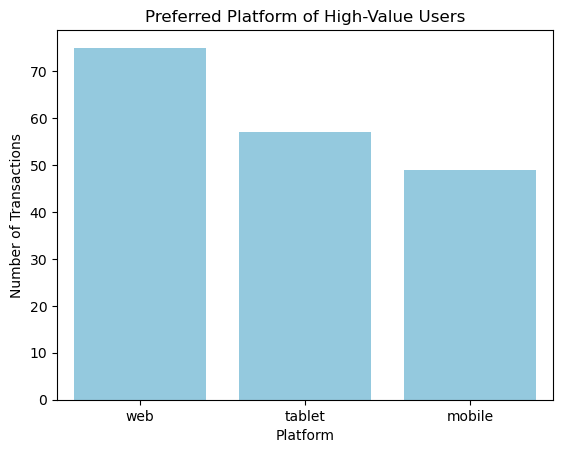

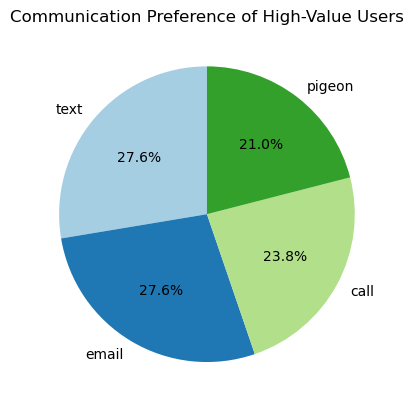

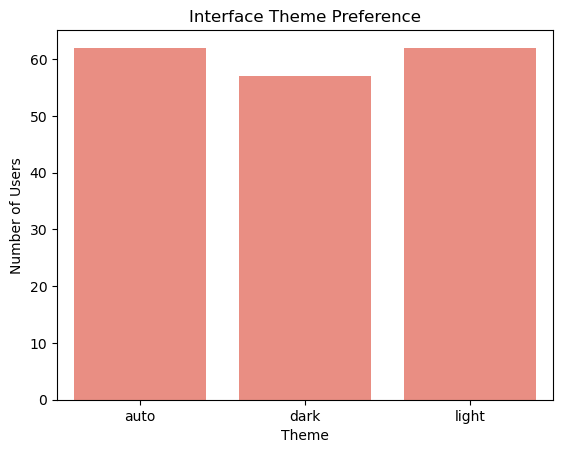

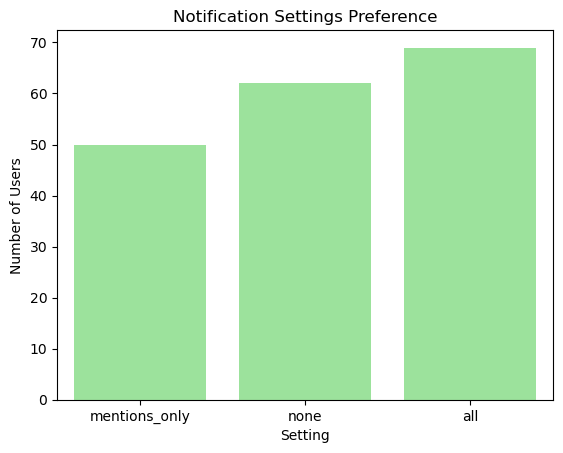

In [43]:
#Generated code

import seaborn as sns
import matplotlib.pyplot as plt

#Platform Preferences (bar chart)
sns.countplot(x='platform', data=high_value_users_with_preferences, color='skyblue')
plt.title('Preferred Platform of High-Value Users')
plt.xlabel('Platform')
plt.ylabel('Number of Transactions')
plt.show()

#Communication Preferences (pie chart)
comm_counts = high_value_users_with_preferences['communication_preference'].value_counts()
comm_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Communication Preference of High-Value Users')
plt.ylabel('')
plt.show()

#Interface Theme Preferences (bar chart)
sns.countplot(x='interface_theme', data=high_value_users_with_preferences, color='salmon')
plt.title('Interface Theme Preference')
plt.xlabel('Theme')
plt.ylabel('Number of Users')
plt.show()

#Notification Settings Preferences (bar chart)
sns.countplot(x='notification_settings', data=high_value_users_with_preferences, color='lightgreen')
plt.title('Notification Settings Preference')
plt.xlabel('Setting')
plt.ylabel('Number of Users')
plt.show()

Dicussion Points:

1. How were percentile calculations handled?
This was interesting as I hadn't used the quantile() function before, but I really appreciated the explanation of how it's used and why other methods I would've thought to use wouldn't have worked. I was hesitant to use any functions I hadn't previously worked with, however, this function pretty straightforward and certainly easier to understand than a lot of other concepts that are loosely thrown at us in this course (lol). 

2. What approaches to date filtering were used?
For date filtering, we used SQL queries with a dynamic cutoff date and then subtracted 30 from it. The biggested issue I had here was figuring out that my randomly generated date parameters weren't capturing any dates in the last 30 days. So while the filter was in theory working correctly, I didn't have any data available for it to pull from. 

3. How was the query optimized, CTE, subquery etc…?
The phrasing of this question makes me think this was all supposed to be written as one query which would explain why this lab has taken me so long! I didn't use any subqueries, though in hindsight, that definitely could've implemented. We still used multiple joins and WHERE clauses to get the information needed. 